In [103]:
%matplotlib inline
import seaborn as sb
from sklearn import linear_model
import pandas as pd
import numpy as np

# use statsmodels to do linear least squares regression using 
# "formula notation" like in R
import statsmodels.api as sm
import statsmodels.formula.api as smf

boston = pd.read_csv("../Data/Boston.csv")
nrows = len(boston)

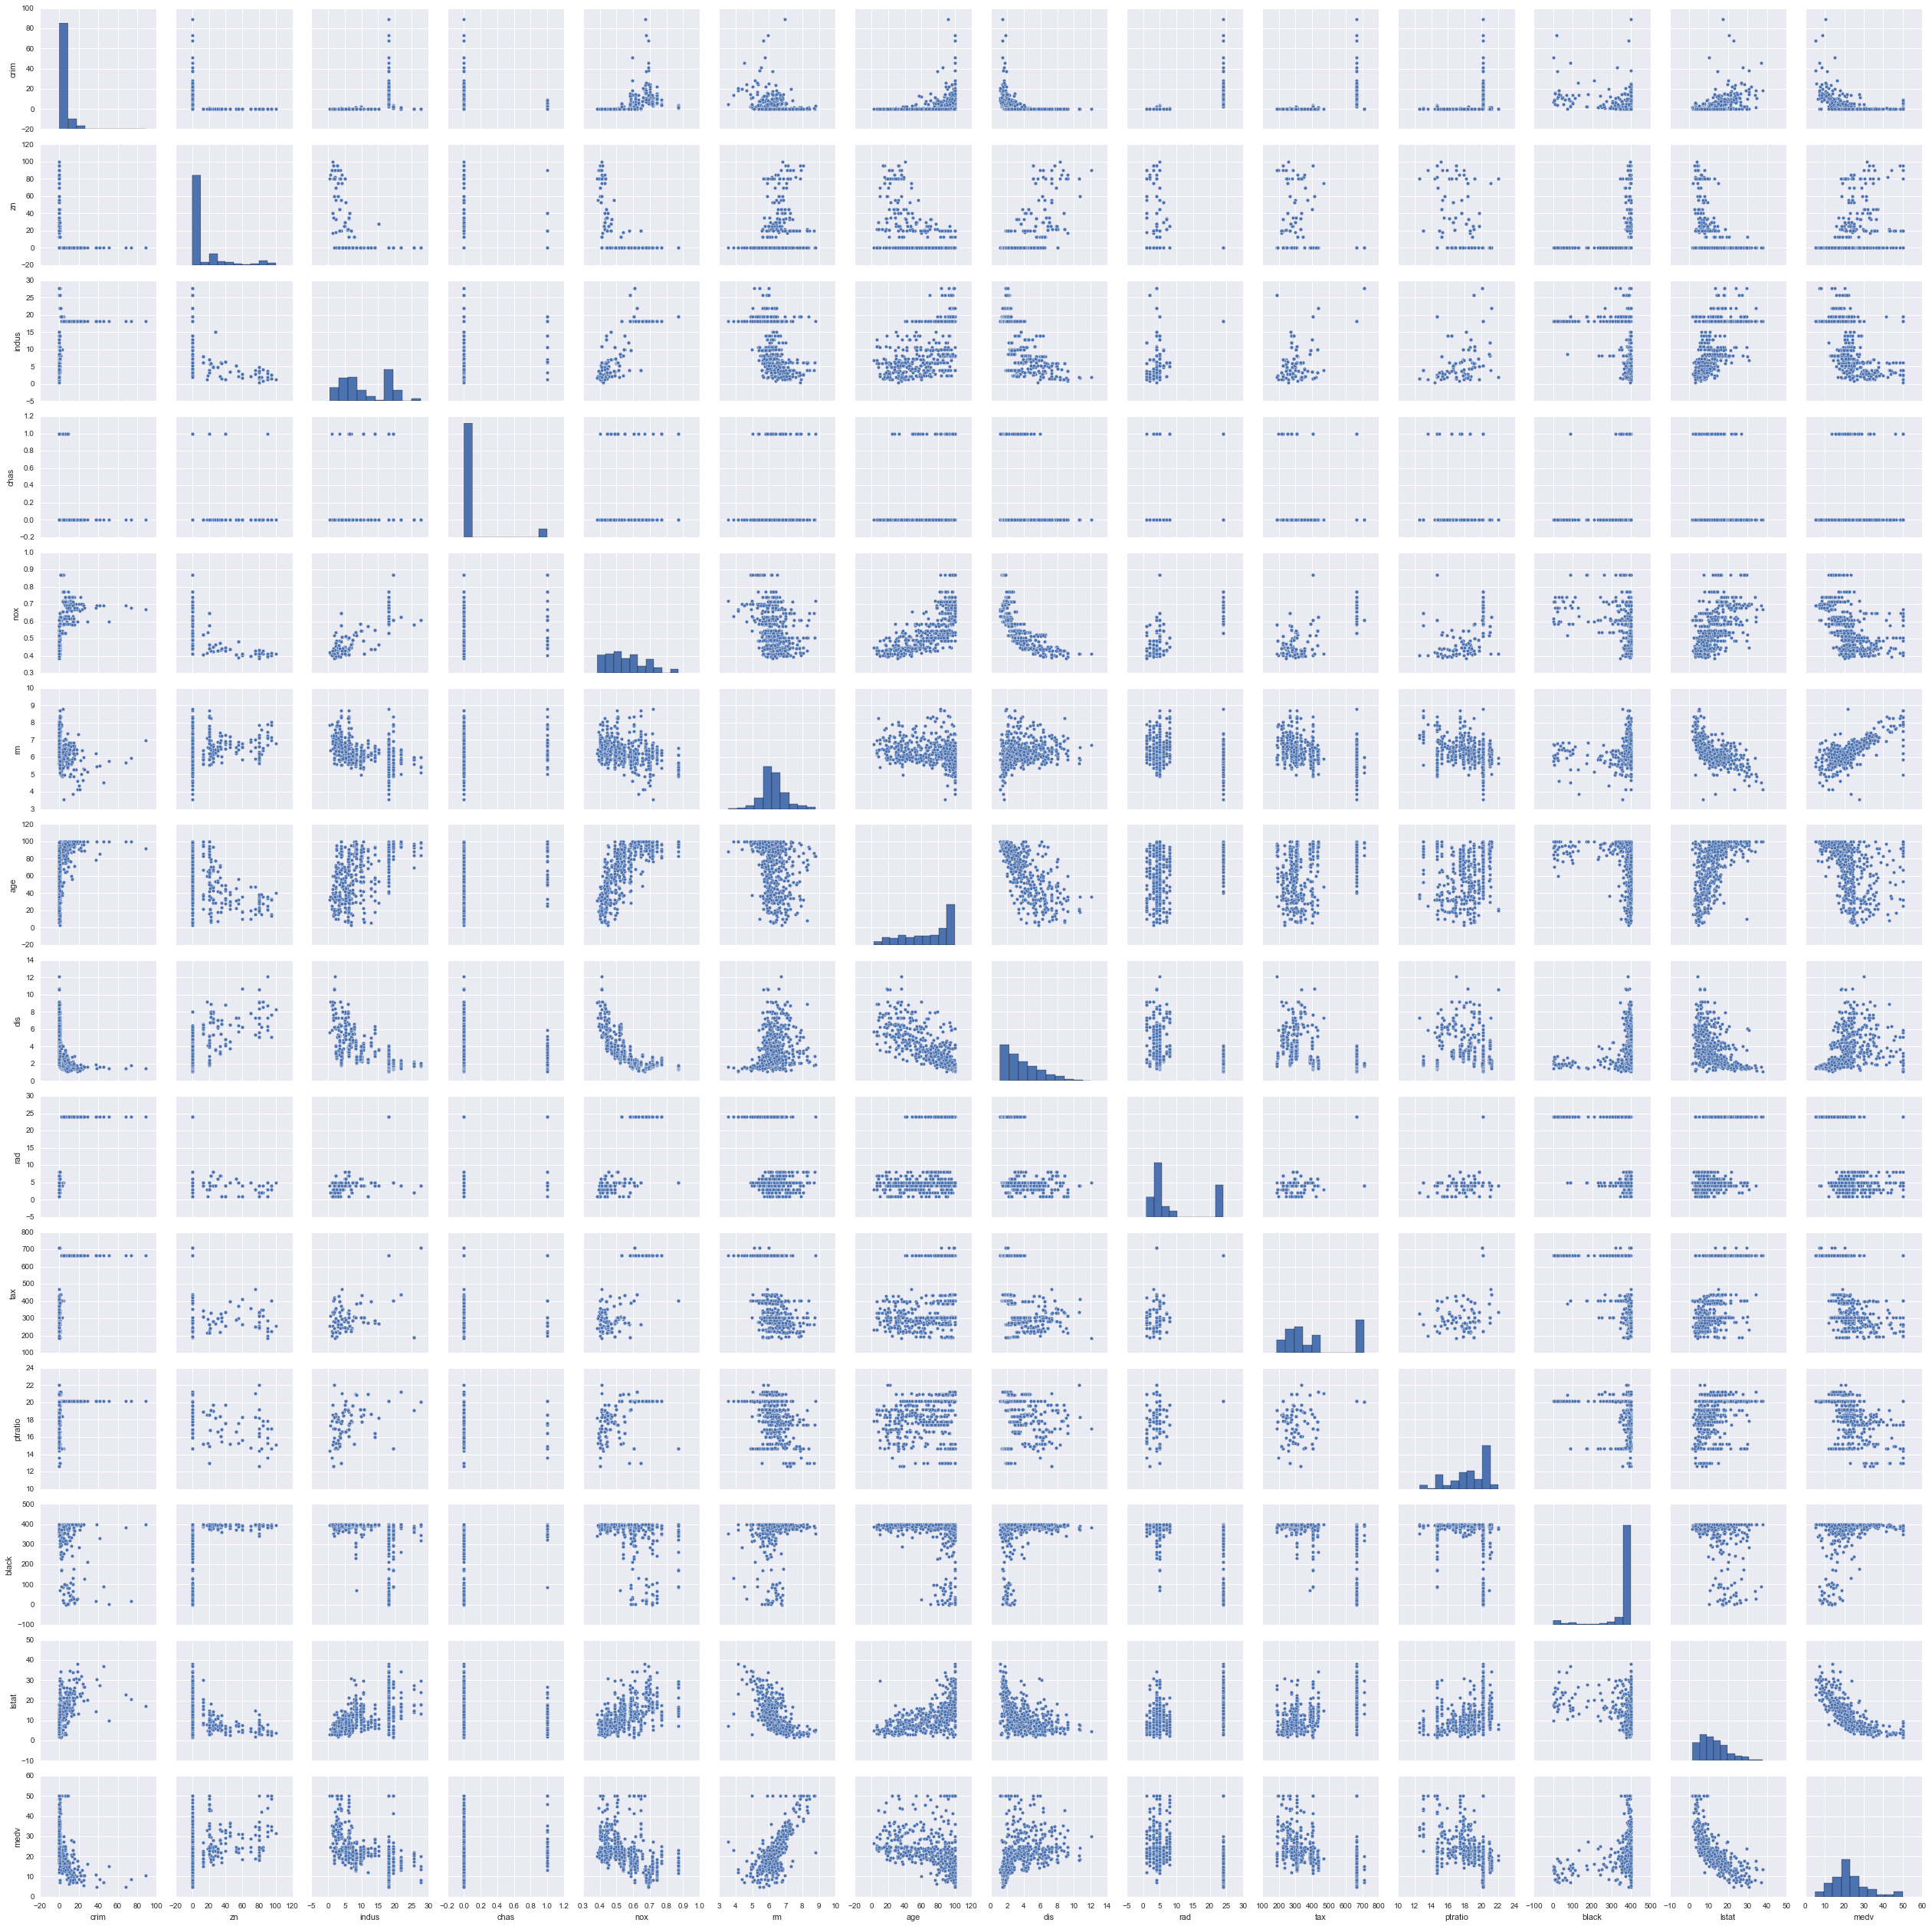

In [104]:
sb.pairplot(boston)

## Creating a linear regression model

Create a linear model with median house value as the response and lstat as the predictor

In [12]:
lm = smf.ols(formula='medv ~ lstat', data=boston)

Fit the model to the data and save the result

In [15]:
result = lm.fit()

Compare the fit parameters to the values quotes in ISL section 3.6.2 (pg 110)

In [17]:
result.params

Intercept    34.553841
lstat        -0.950049
dtype: float64

In [18]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 17 Mar 2017   Prob (F-statistic):           5.08e-88
Time:                        10:20:57   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The information in result.sumary() is similar to what you get by calling lm.fit in R.

Except we also get the 95% confidence interval.

All of the values seems to match exactly witht he values in the textbook

## Making predictions using the model

To make a prediction using `statsmodels` we need to create a new pandas dataframe with the values we want to predict.

In [31]:
predictions = pd.DataFrame({'Intercept': 1, 'lstat': [5,10,15]})
predictions.head()

,Intercept,lstat
0,1,5
1,1,10
2,1,15


In [37]:
result.get_prediction(predictions).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


The predictions (`mean` column) and lower and upper confidence levels are consistent with the ISL textbook (pg 111)

## Plotting the data and model

First we need to create prediction values for the first and last lstat points, so that we can draw the line between them.

In [40]:
X_new = pd.DataFrame({'Intercept': 1, 'lstat': [boston.lstat.min(), boston.lstat.max()]})
preds = result.predict(X_new)

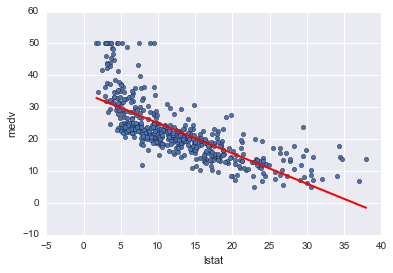

In [43]:
import matplotlib.pyplot as plt
boston.plot(kind='scatter', x='lstat', y='medv')
plt.plot(X_new.lstat, preds, c='red', linewidth=2)

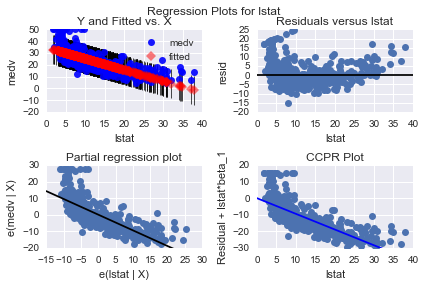

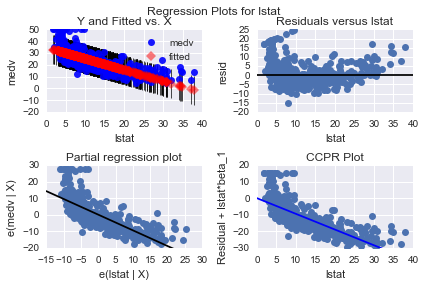

In [47]:
sm.graphics.plot_regress_exog(result, "lstat")

## Multiple linear regression

Similar to the simple linear regression case. We just include additional predictors with a `+` in the regression formula.

In [48]:
multi = smf.ols(formula='medv ~ lstat + age', data=boston)
multi_res = multi.fit()
multi_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Fri, 17 Mar 2017   Prob (F-statistic):           2.98e-88
Time:                        11:21:17   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(All statistics still the same as in ISL pg 113)

In R, you can perform multiple linear regression using all variables by using a formula like: `medv~.`

Unfortunately this syntax doesn't exist in the `patsy` module, which is what `statsmodels` uses for the symbolic formulae.

Instead we have to use some python to create the formula string to pass to statsmodels.

We use DataFrame.columns to get all of the columns names.

But since we don't want the index column or `medv` we remove those before joining the rest with '+'.join()

In [59]:
formula = 'medv~' + '+'.join([col for col in boston.columns[1:] if col != 'medv'])
print formula

medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat


In [62]:
mult2 = smf.ols(formula=formula, data=boston)
m2_res = mult2.fit()
m2_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 17 Mar 2017   Prob (F-statistic):          6.72e-135
Time:                        11:33:15   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Note that after including all of the predictors the `age` variable is not longer significant. It was significant (P=0.005) when only lstat and age were included in the model.

## Interaction terms in multiple regression

In `R` interaction terms are added to formulae using `a:b` syntax. 
If `*` is used instead, both the individual predictors and interaction term will be included in the model. `*` is shorthand for `a + b + a:b`.

In `statsmodels / patsy` the convention is the same.

In [63]:
smf.ols(formula='medv~lstat*age', data=boston).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Fri, 17 Mar 2017   Prob (F-statistic):           4.86e-88
Time:                        11:49:01   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

And we see that `age` alone is not significant, but there's a quite significant contribution from the interaction between `lstat` and `age`.

## Non-linear transformation of the predictors

In `R` the syntax `I(X^2)` is used to raise a predictor X to the power of 2. The `I()` is needed because `^` has special meaning in a formula.

In `statsmodels / patsy` you can instead use numpy apply transformations to variables.

In [68]:
non_linear = smf.ols(formula='medv~lstat + np.power(lstat,2)', data=boston).fit()
non_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Fri, 17 Mar 2017   Prob (F-statistic):          1.56e-112
Time:                        12:15:50   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.8620      0.872     49.149      0.000      41.149      44.575
lstat                 -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.power(lstat, 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
linear = smf.ols(formula='medv~lstat', data=boston).fit()
table = sm.stats.anova_lm(linear, non_linear)
print table

   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0       504  19472.381418        0         NaN         NaN           NaN
1       503  15347.243158        1  4125.13826  135.199822  7.630116e-28


We can replicate the `poly()` function in `R` by writing a little function to create a formula with several powers of the predictor:

In [81]:
def poly_formula(y, x, power):
    powers = '+'.join(["np.power({x},{p})".format(x=x, p=p) for p in range(1,power+1)])
    return '{y}~{x}'.format(y=y, x=powers)

print poly_formula('medv', 'lstat', 5)

medv~np.power(lstat,1)+np.power(lstat,2)+np.power(lstat,3)+np.power(lstat,4)+np.power(lstat,5)


In [83]:
p5 = smf.ols(formula=poly_formula('medv', 'lstat', 5), data=boston).fit()
p5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Fri, 17 Mar 2017   Prob (F-statistic):          8.73e-122
Time:                        12:23:45   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             67.6997      3.604     18.783      0.000      60.618      74.781
np.power(lstat, 1)   -11.9911      1.526     -7.859      0.000     -14.989      -8.994
np.power(lstat, 2)     1.2728      0.223      5.703      0.000       0.834       1.711
np.power(lstat, 3)    -0.0683      0.014     -4.747      0.000      -0.097      -0.040
np.power(lstat, 4)     0.0017      0.000      4.143      0.000       0.001       0.003
np.power(lstat, 5) -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

These results are NOT the same as on ISL page 117.

The overall fit statistics are the same: R^2, F-stat, but the fitted parameters are very different.

This is because the `poly()` funciton in `R` creates *orthogonal polynomials*.

See http://davmre.github.io/python/2013/12/15/orthogonal_poly for some details and how to create an orthogonal polynomial.

## Qualitative predictors

In [86]:
carseats = pd.read_csv("../Data/Carseats.csv")
carseats.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


`statsmodels` and `patsy` seem to be able to deal with categorical variables by default.

I assume that the first category in the dataframe is taken as the baseline, which is why it automatically makes dummy variables for `ShelveLoc.Good` and `ShelveLoc.Medium` below.

In [102]:
formula = 'Sales~' + '+'.join([col for col in carseats.columns[1:] if col != 'Sales'])
smf.ols(formula+'+Income:Advertising + Price:Age', data=carseats).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Fri, 17 Mar 2017   Prob (F-statistic):          6.14e-166
Time:                        13:26:48   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756      1.009      6.519      0.000       4.592       8.559
ShelveLoc[T.Good]       4.8487      0.153     31.724      0.000       4.548       5.149
ShelveLoc[T.Medium]     1.9533      0.126     15.531      0.000       1.706       2.201
Urban[T.Yes]            0.1402      0.112      1.247      0.213      -0.081       0.361
US[T.Yes]              -0.1576      0.149     -1.058      0.291      -0.450       0.135
CompPrice               0.0929      0.004     22.567      0.000       0.085       0.101
Income                  0.0109      0.003      4.183      0.000       0.006       0.016
Advertising             0.0702      0.023      3.107      0.002       0.026       0.115
Population              0.0002      0.000      0.433      0.665      -0.001       0.001
Price                  -0.1008      0.007    -13.549      0.000      -0.115      -0.086
Age                    -0.0579      0.016     -3.633      0.000      -0.089      -0.027
Education              -0.0209      0.020     -1.063      0.288      -0.059       0.018
ShelveBad            7.573e-16   1.19e-16      6.355      0.000    5.23e-16    9.92e-16
Income:Advertising      0.0008      0.000      2.698      0.007       0.000       0.001
Price:Age               0.0001      0.000      0.801      0.424      -0.000       0.000
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     3.59e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.32e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""